In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
hsp_df = pd.read_csv('data/hospital_readmissions.csv')
hsp_df.head()

In [ ]:
hsp_df.info()

In [ ]:
hsp_df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

hsp_df.head()

In [ ]:

print(hsp_df['age'].unique())

hsp_df['age_cat'] = hsp_df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')

hsp_df['age_cat'] = hsp_df['age_cat'].astype('category')
print('dtype :',hsp_df['age_cat'].dtype)


hsp_df[['age','age_cat']]

In [ ]:

hsp_df.drop('age', axis=1, inplace=True)


cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']


hsp_df[cols_to_convert] = hsp_df[cols_to_convert].astype('category')

hsp_df.dtypes

In [ ]:

hsp_df.duplicated().sum()

In [ ]:

cols = hsp_df.columns

for c in cols:
    print(c)
    print('\n',hsp_df[c].unique())

In [ ]:

hsp_df.describe()

In [ ]:

hsp_df.describe(exclude=[np.number])

In [ ]:


columns = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=hsp_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

In [ ]:

df = hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()
df

In [ ]:

g = sns.catplot(x='primary_diagnosis',col='age_cat', kind='count', data=hsp_df, col_wrap=2)
g.set_xticklabels(rotation=90)
plt.show()

In [ ]:


cat_vars = ['primary_diagnosis','sec_diagnosis','additional_sec_diag']

fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = hsp_df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
plt.show()

In [ ]:
#subsetting for patient with DM diagnosis
diabetes_pt = hsp_df[(hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes')]
diabetes_pt.head()

In [ ]:
#subsetting patient with non-DM diagnosis
non_diabetes_pt = hsp_df[~((hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes'))]

#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))

In [ ]:
#value counts of DM patients readmitted
diabetes_pt['readmitted'].value_counts(normalize=True)

In [ ]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

# Show the pie chart
plt.show()


In [ ]:
#value counts of non-DM patients readmitted
non_diabetes_pt['readmitted'].value_counts(normalize=True)

In [ ]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')

# Show the pie chart
plt.show()


In [ ]:
#table showing the count of readmitted patient for each diagnosis
pd.set_option('display.max_rows', 64)
hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()

After exploring the data I could deduct that about 8788  patients had Diabetes as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis. This made up about one-third of the patients population.Amongst the DM patient approximately 47 percent were readmitted while 53 percent where not.
While about 16212 patients did not have DM as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis.This makes about two-third of the patients population.Amongst the non-DM patients approximately 47 percent were readmitted while 53 percent were not. From the analysis we cannot really say if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates


## what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

In [ ]:
#viewing the dataset
hsp_df.head()

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


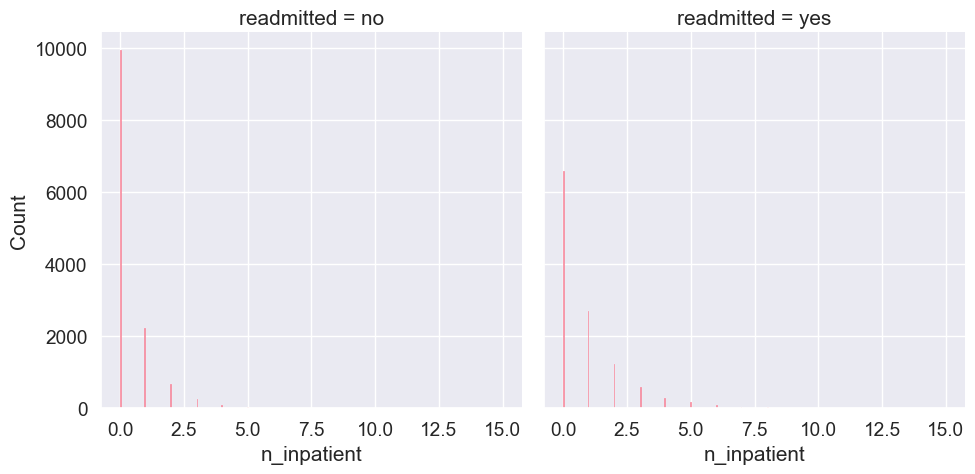

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


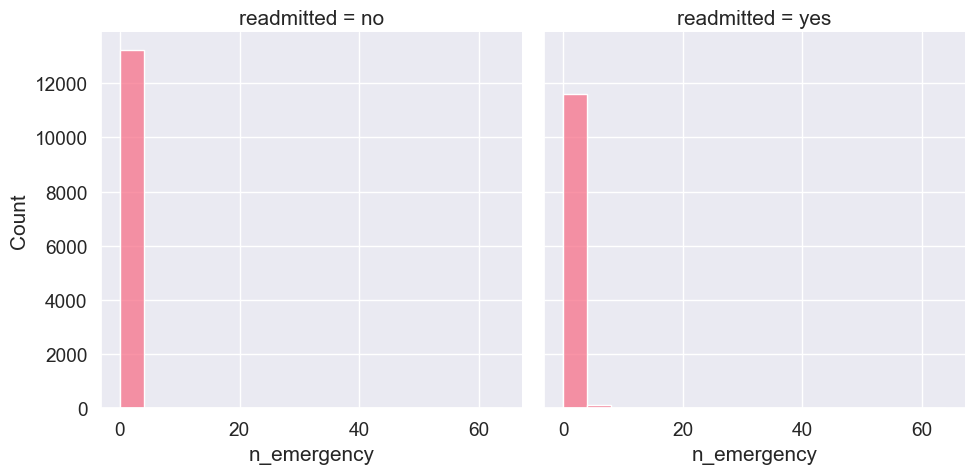

In [69]:
#plotting a grap showing the distribution of numerical columns by their readmitted status
columns = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.displot(x=c, data=hsp_df, col='readmitted',col_wrap=2)
        #plt.title(c)
        #plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


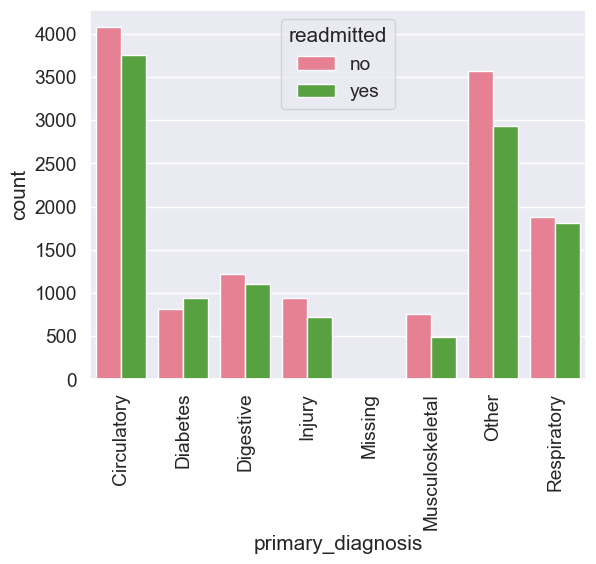

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


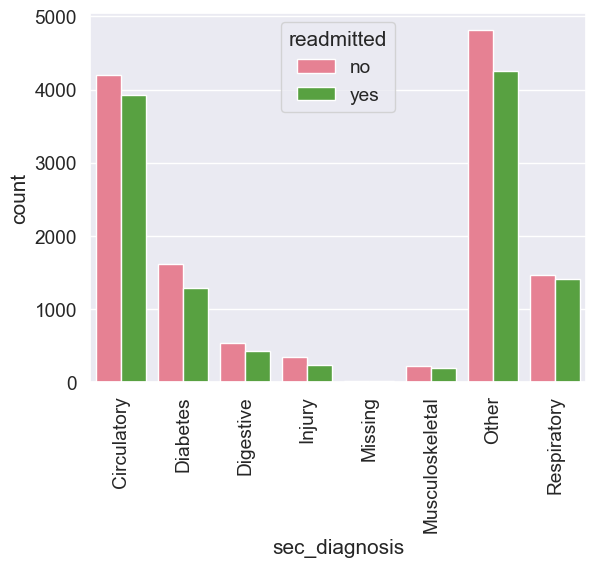

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


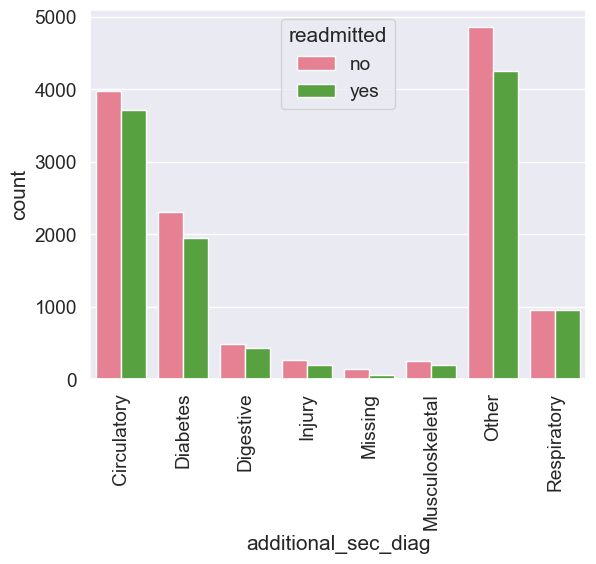

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


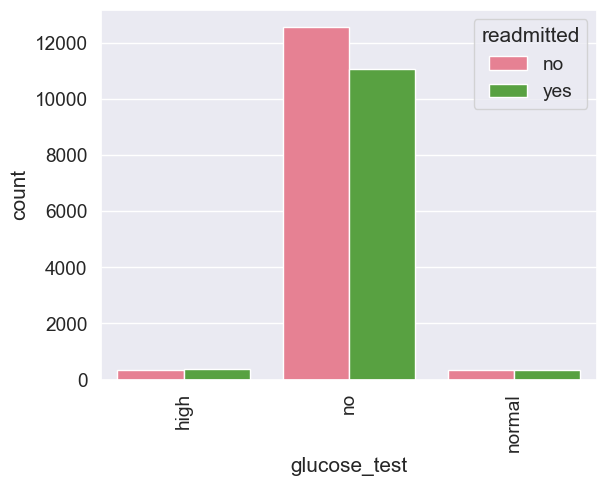

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


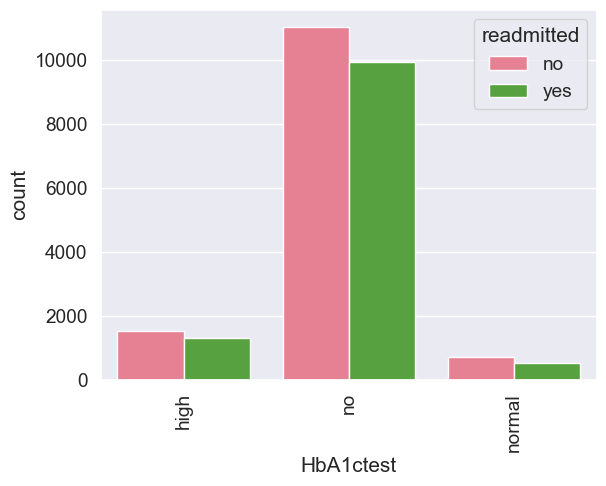

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


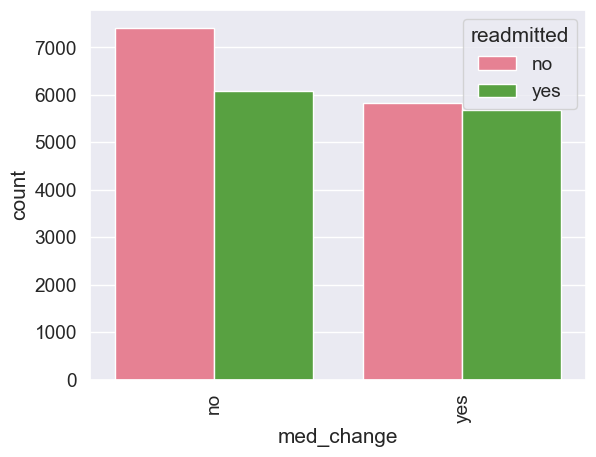

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


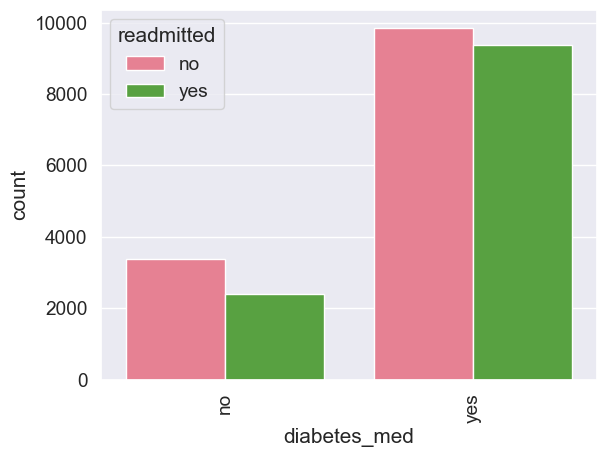

c:\Users\Kannadasan\anaaaaaa\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


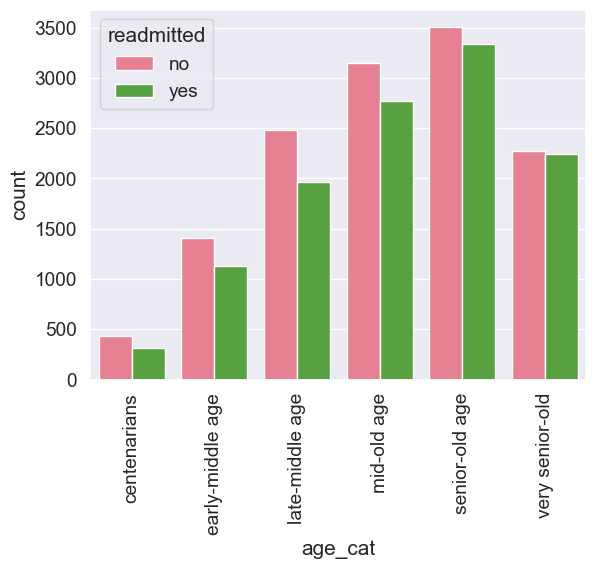

In [70]:
#visualizing the categorical columns by thier readmitted status
columns = ['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat']

def count_plot():
    for c in columns:
        sns.countplot(x=c, hue='readmitted', data=hsp_df)
        plt.xticks(rotation=90)
        plt.show()
        
count_plot()

In [71]:
hsp_df['age_cat'] = hsp_df['age_cat'].replace({'senior-old age':7,
                                           'late-middle age':5,'mid-old age':6,
                                           'early-middle age':4,'very senior-old':8,'centenarians':9})


In [72]:
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,7
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,7
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,5
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,7
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,6


In [73]:
diag_cols = ["primary_diagnosis", "sec_diagnosis", "additional_sec_diag"]

# get unique categories
categories = pd.unique(hsp_df[diag_cols].values.ravel())

# one-hot dataframe
one_hot = pd.DataFrame(0, index=hsp_df.index, columns=categories)

for col in diag_cols:
    one_hot = one_hot | pd.get_dummies(hsp_df[col]).reindex(columns=categories, fill_value=0)

one_hot = one_hot.astype(int)
# drop diag cols
hsp_df_dropped = hsp_df.drop(columns=diag_cols)

insert_at = 8

# split df into two parts
left = hsp_df_dropped.iloc[:, :insert_at]
right = hsp_df_dropped.iloc[:, insert_at:]

# concat with one-hot in middle
hsp_df_final = pd.concat([left, one_hot, right], axis=1)

# display head
print(hsp_df_final.head())

   time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0                 8                72             1             18   
1                 3                34             2             13   
2                 5                45             0             18   
3                 2                36             0             12   
4                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty  Circulatory  \
0             2            0            0           Missing            1   
1             0            0            0             Other            0   
2             0            0            0           Missing            1   
3             1            0            0           Missing            1   
4             0            0            0  InternalMedicine            1   

   Respiratory  ...  Injury  Digestive  Musculoskeletal  Missing  \
0            1  ...       0          0                

In [74]:
hsp_df=hsp_df_final

In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Suppose your dataframe is df
categorical_cols = hsp_df.select_dtypes(include=['category']).columns
print("Categorical Columns:", categorical_cols)

# Encode each column separately
for col in categorical_cols[:-1]:
    le = LabelEncoder()
    hsp_df[col] = le.fit_transform(hsp_df[col].astype(str))  # Convert to string first to handle NaN

hsp_df.head()


Categorical Columns: Index(['medical_specialty', 'glucose_test', 'HbA1ctest', 'med_change',
       'diabetes_med', 'readmitted', 'age_cat'],
      dtype='object')


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,Circulatory,Respiratory,...,Injury,Digestive,Musculoskeletal,Missing,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,4,1,1,...,0,0,0,0,1,1,0,1,0,7
1,3,34,2,13,0,0,0,5,0,0,...,0,0,0,0,1,1,0,1,0,7
2,5,45,0,18,0,0,0,4,1,0,...,0,0,0,0,1,1,1,1,1,5
3,2,36,0,12,1,0,0,4,1,0,...,0,0,0,0,1,1,1,1,1,7
4,1,42,0,7,0,0,0,3,1,1,...,0,0,0,0,1,1,0,1,0,6


In [76]:
hsp_df.drop('Missing', axis=1, inplace=True)

In [77]:
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,Circulatory,Respiratory,...,Diabetes,Injury,Digestive,Musculoskeletal,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,4,1,1,...,0,0,0,0,1,1,0,1,0,7
1,3,34,2,13,0,0,0,5,0,0,...,0,0,0,0,1,1,0,1,0,7
2,5,45,0,18,0,0,0,4,1,0,...,0,0,0,0,1,1,1,1,1,5
3,2,36,0,12,1,0,0,4,1,0,...,1,0,0,0,1,1,1,1,1,7
4,1,42,0,7,0,0,0,3,1,1,...,0,0,0,0,1,1,0,1,0,6


In [92]:
hsp_df["total_visits"] = hsp_df["n_outpatient"] + hsp_df["n_inpatient"] + hsp_df["n_emergency"]

# 2. high_risk = (A1Ctest == "High" or glucose_test == "High")
hsp_df["high_risk"] = np.where((hsp_df["HbA1ctest"] == "High") | (hsp_df["glucose_test"] == "High"), 1, 0)



In [95]:
hsp_df.head()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,Circulatory,Respiratory,...,Musculoskeletal,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat,total_visits,high_risk,severity
0,8,72,1,18,2,0,0,4,1,1,...,0,1,1,0,1,0,7,2,0,high
1,3,34,2,13,0,0,0,5,0,0,...,0,1,1,0,1,0,7,0,0,low
2,5,45,0,18,0,0,0,4,1,0,...,0,1,1,1,1,1,5,0,0,medium
3,2,36,0,12,1,0,0,4,1,0,...,0,1,1,1,1,1,7,1,0,low
4,1,42,0,7,0,0,0,3,1,1,...,0,1,1,0,1,0,6,0,0,low


In [94]:
def severity(days):
    if days <= 3:
        return "low"
    elif days <= 7:
        return "medium"
    else:
        return "high"

hsp_df["severity"] = hsp_df["time_in_hospital"].apply(severity)

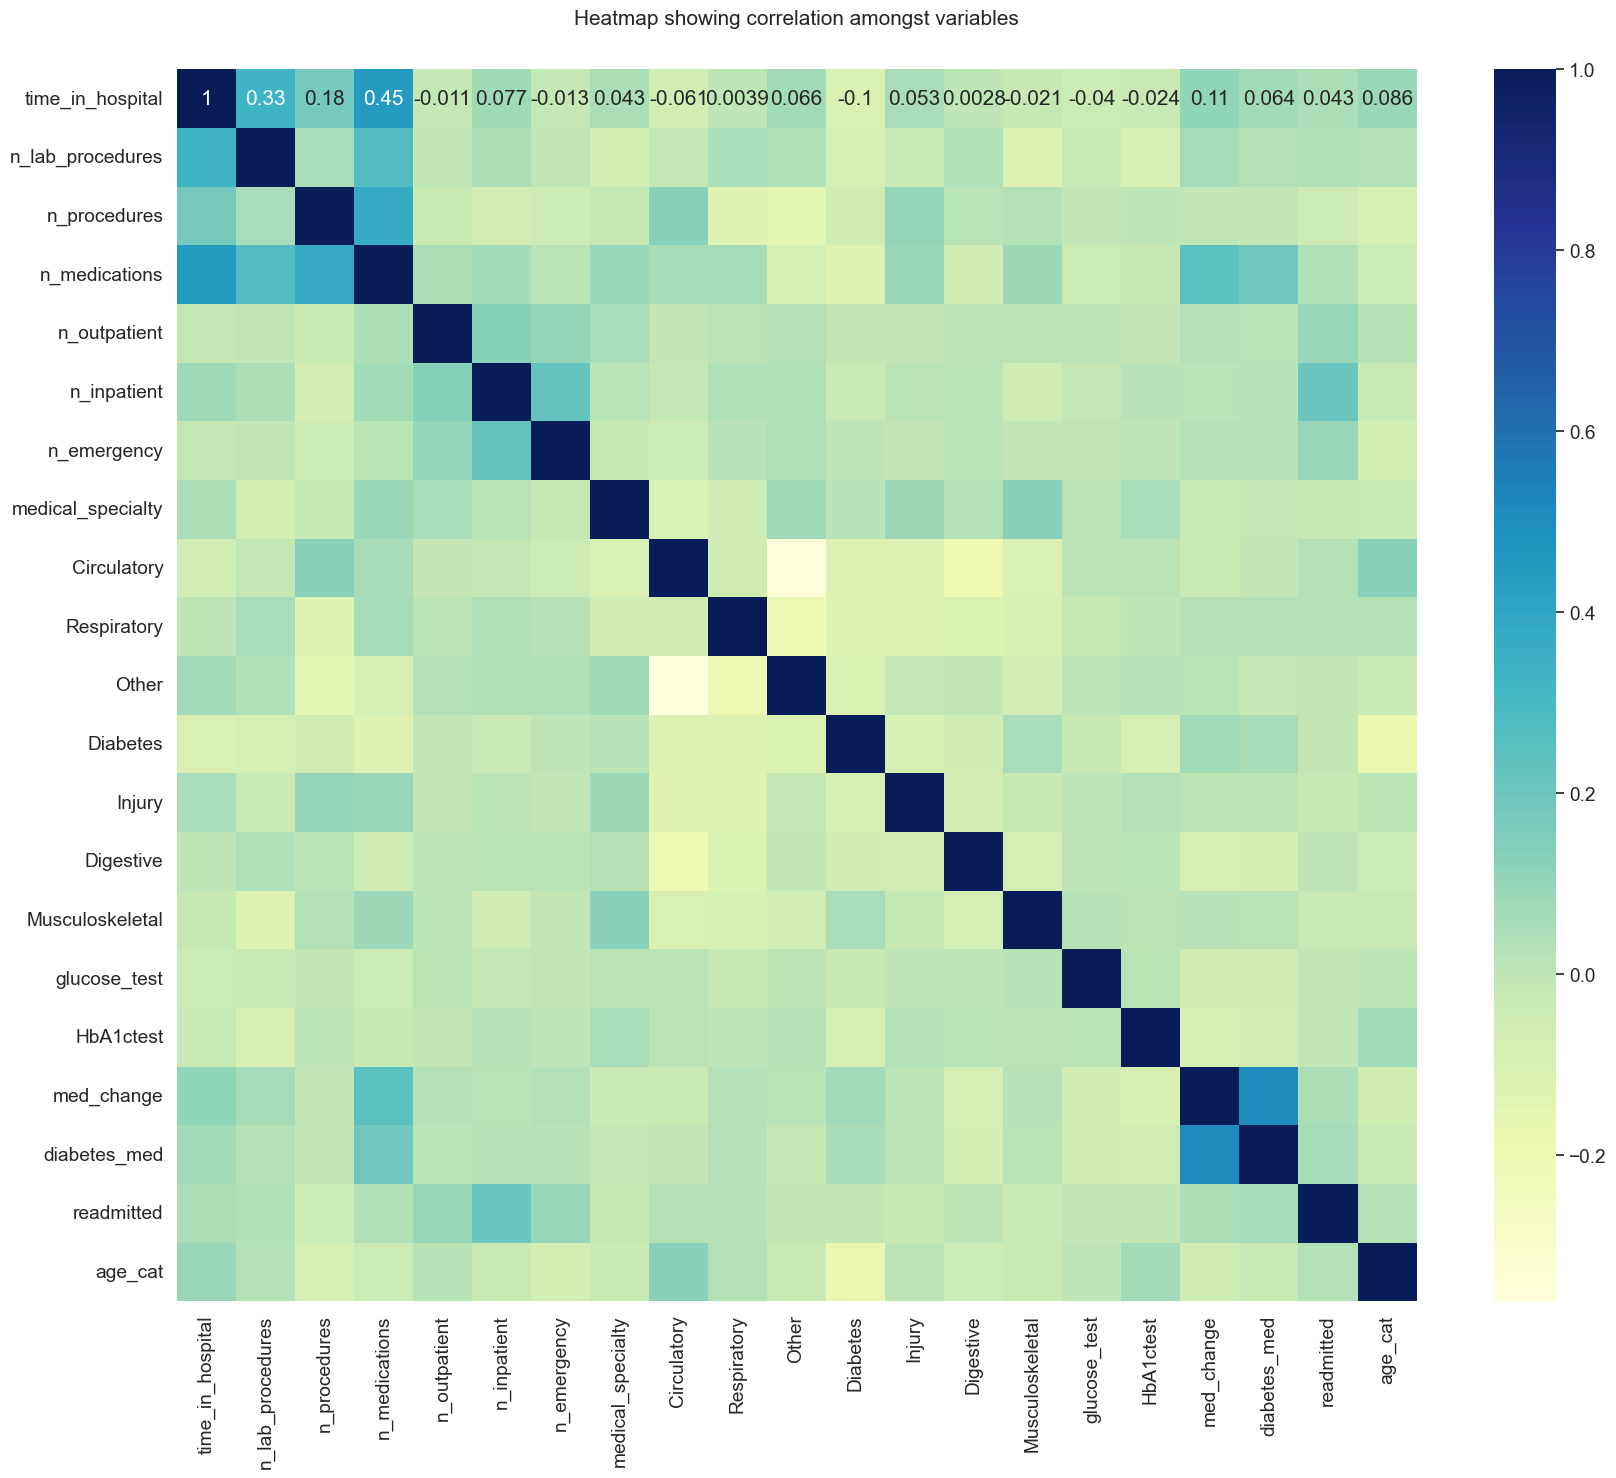

In [78]:

#visualizing correlation between variables
plt.figure(figsize=(20,16))
sns.heatmap(hsp_df.corr(), cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

### Data Visualization summary:
From the graphs above, there are no significant factor that could show what group of patient were more likely to be readmitted as their distribution and patterns were alike across all categories of readmitted status.

However, we can notice the heatmap shows a weak correlation between n_inpatient and readmitted

In [79]:
#checking the variance of variables
hsp_df.var()

TypeError: 'Categorical' with dtype category does not support reduction 'var'

**Briefly Note that although we can notice there is a huge difference between the variance of the different columns I wont be standardizing or normalizing the variables as I would be using classification tree models because it has ability to describe non-linear dependencies and it does not require preprocessing of varibales before modelling.**

In [80]:
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'
features = hsp_df.drop(['medical_specialty','readmitted'], axis=1)
features

#using pandas get dummies encoder
X_features = pd.get_dummies(features, columns =['Circulatory', 'Respiratory', 'Other', 'Injury', 'Digestive', 'Diabetes','Musculoskeletal',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat'])
X = X_features.values

y = hsp_df['readmitted'].values

print('X shape:', X.shape)
print('X_features:',X_features.shape)
print('y shape:', y.shape)

X shape: (25000, 37)
X_features: (25000, 37)
y shape: (25000,)


In [81]:
#checking if the data is balance
hsp_df['readmitted'].value_counts()

readmitted
0    13246
1    11754
Name: count, dtype: int64

In [82]:
#import modules and packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

In [83]:
names = X_features.columns

### DECISION TREE CLASSIFIER

In [84]:
# define the model
dtc = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=0.20)

# fit the model
dtc.fit(X_train, y_train)

test_predictions = dtc.predict(X_test)
train_prediction = dtc.predict(X_train)

#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6026857142857143
Testing_accuracy_score : 0.608
precision_score : 0.6168261562998405
recall_score : 0.4387407827566648


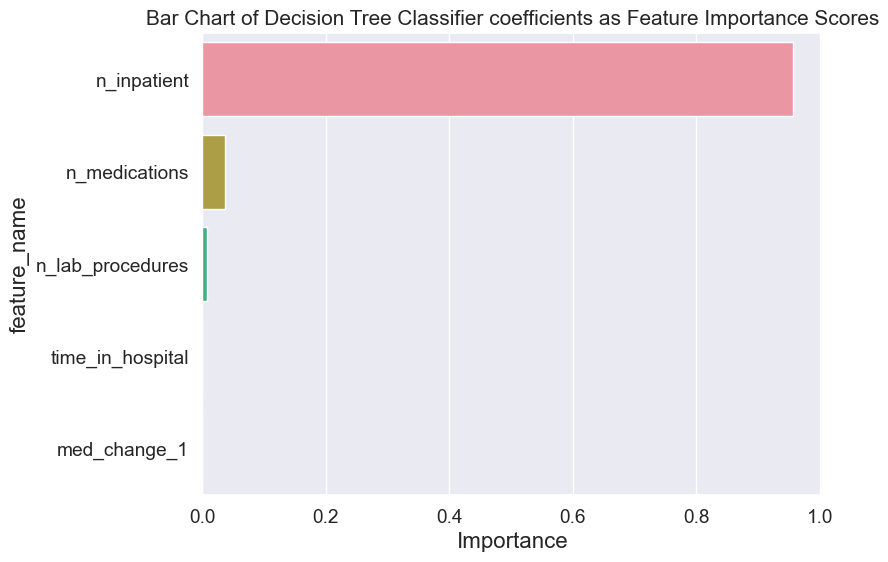

In [85]:
# get importance
importance = dtc.feature_importances_

# plot feature importance
imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Decision Tree Classifier coefficients as Feature Importance Scores')
plt.show()

### RANDOM FOREST CLASSIFIER

In [86]:
# define the model
rfc = RandomForestClassifier(random_state=23,n_estimators=100,max_depth=6)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=23)

In [87]:


test_predictions = rfc.predict(X_test)
train_prediction = rfc.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6314857142857143
Testing_accuracy_score : 0.6145333333333334
precision_score : 0.6188693373268439
recall_score : 0.46880317640385705


In [ ]:
# get importance
importance = rfc.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

## TUNING RANDOM FOREST HYPER-PARAMETERS

In [ ]:
#inspecting the hyperparameters of the randomforestclassifier
print(rfc.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=23)

params_rfc = {'max_depth':[3,6,8], 'min_samples_leaf':[0.04, 0.08, 1], 'max_features':['auto','sqrt','log2']}

grid_rfc = GridSearchCV(estimator=rfc , param_grid= params_rfc, scoring='accuracy', cv=10, n_jobs=-1)
grid_rfc.fit(X_train, y_train)

#extract best hyperparameters from grid_rfc
best_hyperparams = grid_rfc.best_params_
print("best_hyperparams: ", best_hyperparams)

#extract best cv score
best_cv_score = grid_rfc.best_score_
print("best_cv_score: ", best_cv_score)

#extract best model
best_model = grid_rfc.best_estimator_
print("best_model: ", best_model)

#evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print("test_acc: ",test_acc)

In [ ]:
# define the model
rfc2 = RandomForestClassifier(random_state=23,max_depth=8, max_features= 'log2',min_samples_leaf=1)
# fit the model
rfc2.fit(X_train, y_train)

test_predictions = rfc2.predict(X_test)
train_prediction = rfc2.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix of Tunned RandomForestClassifier')
plt.show()

In [ ]:
# get importance
importance = rfc2.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

## Model Selection

I used **DecisionTreeClassifier** as a baseline model and **RandomForestClassifier** as comparison model.

Firstly looking at their various scores for accuracy,precision and recall the **RandomForestClassifier and the Decision tree classifier performed slightly thesame with the RandomForest classifier having a accuracy_score : 0.60, precision_score : 0.61 and recall_score : 0.44.** while the **decision Tree Classifier had an accuracy_score : 0.60, precision_score : 0.61 and recall_score : 0.43**. 

 **DecisionTreeClassifier**
 A DecisionTreeClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
 From the fitted model we observe that **n_inpatient ,n_outpatient, and n_lab_procedures** were the most important feature for predicting a patient readmission.
 
 
**RandomForestClassifier**
 A RandomForestClassifier provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
 From the fitted model we observe that **n_inpatient ,n_outpatient, and n_emergency** were the most important feature for predicting a patient readmission.
 
 Also, we could we that the accuracy score of both models were pretty low, to obtain the best performance of the randomforest classifier model it was tunned using the Grid search CV approach there was an increase in accuracy score by .1 resulting in the model having an **accuracy score of 0.61**.  From the tunned model we observe that **n_inpatient ,n_outpatient, and n_medications** were the most important feature for predicting a patient readmission.

## Recommendations
From the analysis above, 
1. Circulatory diagnosis was the most common primary diagnosis across the varoius categories of age outside early middle age where Others as a diagnosis category came first and circulatory diagnosis second.

2. On the effects of diabetes diagnosis on readmission ,the analysis doesnt confirms if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates

3. I would recommend for the hospital to focus their follow-up efforts to better monitor patients :
 - who have had high number of inpatient visits in the year before the hospital stay ,that is patient whe had currently been admitted in the hospital before 
 - who have had high number of outpatient visits in the year before the hospital stay, that is patient who had frequented the hospital as an outpatient
 - patients who are on plenty medications
 - patients who under go various lab procedures
 - patients who had being brought to the hospital as an emergency situation before current hospital stay
 
they are very important factors to be considered as they have a high probability to determine if a patient wil be readmitted.